In [1]:
#Import important libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Dataset
from sklearn.datasets import load_iris

#For Model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Model saving
import pickle

### Dataset Loading

In [2]:
#Loading the Iris data 
dataset = load_iris()

#Feature names
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
#Target classes
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#Target variable where the three values map to the target classes
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
#Creating a dataframe with the features and the target variable
iris_data = pd.DataFrame(
        dataset.data,
        columns=dataset.feature_names,
)

#Adding the target column
iris_data["species"] = dataset.target

iris_data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

### Exploratory Data Analysis

In [6]:
iris_data.shape

(150, 5)

In [7]:
#Checking for null values
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [8]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
dtype: object

In [9]:
#Description of the data
iris_data.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

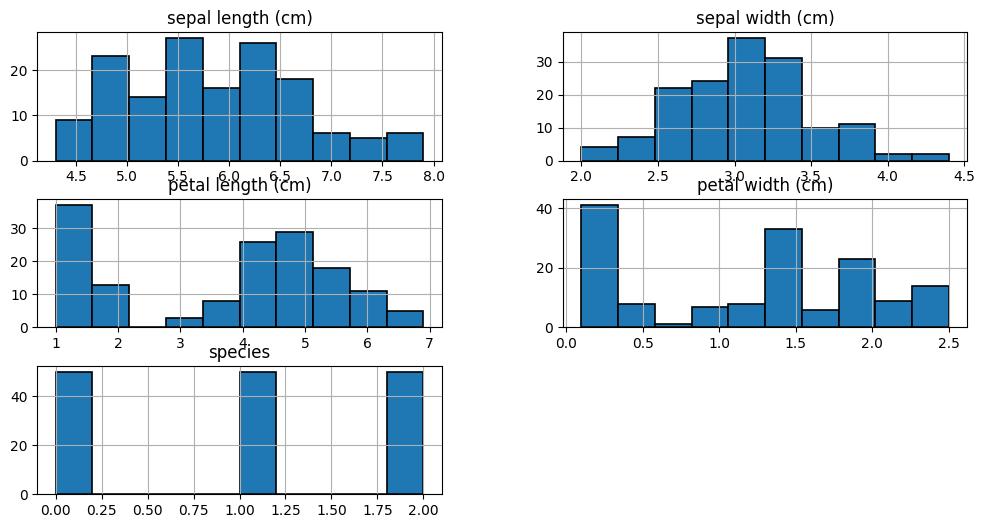

In [10]:
#Length and width distribution of each feature
iris_data.hist(edgecolor='black', linewidth=1.2, figsize=(12,6))
plt.show()

### Model building - Logistic Regression

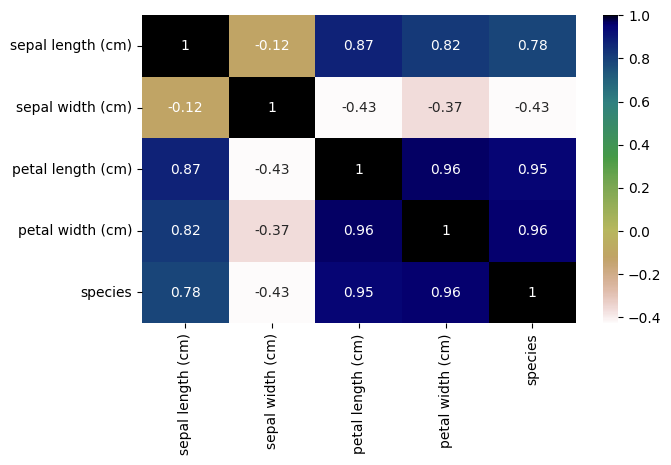

In [11]:
#Visualizing the correlation of the features using heatmap
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_data.corr(),annot=True, cmap='gist_earth_r')
plt.show()

**Petal length and width are highly correlated, while sepal length and width are not correlated**

In [12]:
#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop('species', axis=1), #predictors
    iris_data['species'], #target
    test_size=0.3, #percentage of observations in test set
    random_state=42 #seed to ensure reproducibility
)
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [13]:
model = LogisticRegression()

#Fitting the model to the train set
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
#Trained model prediction on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [15]:
#Model performance evaluation
print("Accuracy of the Logistic Regression model:", accuracy_score(y_test, y_pred))
print()
print("Macro-Averaged F1 score of the Logistic Regression model: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy of the Logistic Regression model: 1.0

Macro-Averaged F1 score of the Logistic Regression model:  1.0


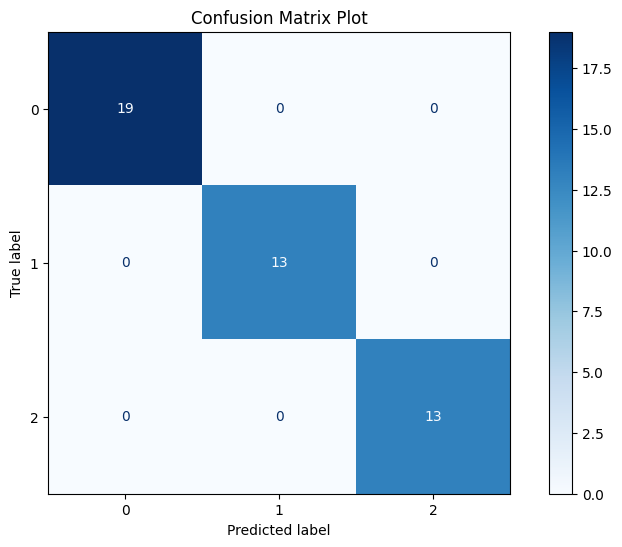

In [16]:
#Target classes
labels = model.classes_

fig, ax = plt.subplots(figsize=(10, 6))

#Confusion matrix visualization for the classifier
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.grid(visible=False)
plt.title("Confusion Matrix Plot", size=12)

plt.show()

### Model saving with Pickle

In [17]:
filePath = "logreg_1_0_model.pkl"

# Save Model
with open(filePath, "wb") as file:
    pickle.dump(model, file)

**Proof that it loads on the scikit-learn version 1.0 enivornment**

In [18]:
# Load Model from version 1.0
filePath = "logreg_1_0_model.pkl"

with open(filePath, "rb") as file:
    logreg_model = pickle.load(file)

In [19]:
y_pred_proba = logreg_model.predict_proba(X_test)[::, 1]
y_pred_proba


array([0.81229118, 0.05796635, 0.00209419, 0.77323377, 0.75129815,
       0.04990734, 0.90413955, 0.14749245, 0.78060899, 0.94080708,
       0.2253226 , 0.0372637 , 0.03079458, 0.04394049, 0.02345536,
       0.66333352, 0.02672914, 0.94515067, 0.82008859, 0.04145997,
       0.0412557 , 0.38668089, 0.04369634, 0.05211075, 0.02037042,
       0.10553933, 0.06985485, 0.01949445, 0.03900289, 0.0504813 ,
       0.00679586, 0.01928888, 0.89002387, 0.03531611, 0.01739077,
       0.28537815, 0.81215666, 0.03583244, 0.02188042, 0.01691754,
       0.19405391, 0.73698553, 0.75170193, 0.0182297 , 0.03334529])

In [20]:
y_pred = logreg_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])